# Introduction to Using AlgoSeek's Daily Data

In [12]:
import pandas as pd
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import pyarrow.dataset as ds
import os

import plotly
import plotly.graph_objects as go

import pickle
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
daily = pq.ParquetDataset("data/us_equity/example_daily/", use_legacy_dataset=True, filters=[('Year','>',2020),('Year','<',2023)])
daily.schema

C:\Users\julia\AppData\Local\Temp\ipykernel_3208\106658435.py:2: FutureWarning: 'ParquetDataset.schema' attribute is deprecated as of pyarrow 5.0.0 and will be removed in a future version. Specify 'use_legacy_dataset=False' while constructing the ParquetDataset, and then use the '.schema' attribute instead (which will return an Arrow schema instead of a Parquet schema).
  daily.schema


required group field_id=-1 schema {
  optional int64 field_id=-1 TradeDate (Timestamp(isAdjustedToUTC=false, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional binary field_id=-1 Ticker (String);
  optional binary field_id=-1 Name (String);
  optional binary field_id=-1 PrimaryExchange (String);
  optional binary field_id=-1 ISIN (String);
  optional int64 field_id=-1 OpenTime (Timestamp(isAdjustedToUTC=true, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional double field_id=-1 OpenPrice;
  optional int64 field_id=-1 OpenSize;
  optional int64 field_id=-1 HighTime (Timestamp(isAdjustedToUTC=true, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional double field_id=-1 HighPrice;
  optional int64 field_id=-1 LowTime (Timestamp(isAdjustedToUTC=true, timeUnit=microseconds, is_from_converted_type=false, force_set_converted_type=false));
  optional double

In [36]:
last_2year = daily.read().to_pandas()
last_2year.set_index(['Ticker','TradeDate'], inplace=True)

In [59]:
last_2year

Name PrimaryExchange          ISIN  \
Ticker TradeDate                                                               
BUD    2021-01-04  Anheuser-Busch In Bev SA/NV            NYSE  US03524A1088   
       2021-10-04  Anheuser-Busch In Bev SA/NV            NYSE  US03524A1088   
       2021-07-06  Anheuser-Busch In Bev SA/NV            NYSE  US03524A1088   
       2021-10-05  Anheuser-Busch In Bev SA/NV            NYSE  US03524A1088   
       2021-01-05  Anheuser-Busch In Bev SA/NV            NYSE  US03524A1088   
...                                        ...             ...           ...   
BWEB   2022-12-23             Bitwise Web3 ETF            ARCA  US0917481030   
       2022-12-27             Bitwise Web3 ETF            ARCA  US0917481030   
       2022-12-28             Bitwise Web3 ETF            ARCA  US0917481030   
       2022-12-29             Bitwise Web3 ETF            ARCA  US0917481030   
       2022-12-30             Bitwise Web3 ETF            ARCA  US0917481030   

                                          OpenTime  OpenPrice  OpenSize  \
Ticker TradeDate                                                          
BUD    2021-01-04 2021-01-04 09:30:00.862000-05:00    70.5320     20670   
       2021-10-04 2021-10-04 09:30:00.888000-04:00    56.1204     13348   
       2021-07-06 2021-07-06 09:30:00.886000-04:00    70.3362     28575   
       2021-10-05 2021-10-05 09:30:00.825000-04:00    55.7637     13306   
       2021-01-05 2021-01-05 09:30:00.770000-05:00    68.7638     13109   
...                                            ...        ...       ...   
BWEB   2022-12-23        2022-12-23 00:00:00-05:00     0.0000         0   
       2022-12-27 2022-12-27 09:30:00.337000-05:00    21.6800        11   
       2022-12-28 2022-12-28 09:30:00.179000-05:00    21.1000        14   
       2022-12-29        2022-12-29 00:00:00-05:00     0.0000         0   
       2022-12-30 2022-12-30 09:30:00.249000-05:00    21.6200         2   

                                          HighTime  HighPrice  \
Ticker TradeDate                                                
BUD    2021-01-04 2021-01-04 09:30:00.327000-05:00    70.5123   
       2021-10-04 2021-10-04 10:13:53.047000-04:00    56.4770   
       2021-07-06 2021-07-06 09:31:34.530000-04:00    70.3659   
       2021-10-05 2021-10-05 14:49:07.415000-04:00    55.8133   
       2021-01-05 2021-01-05 14:16:03.869000-05:00    69.7952   
...                                            ...        ...   
BWEB   2022-12-23        2022-12-23 00:00:00-05:00     0.0000   
       2022-12-27        2022-12-27 00:00:00-05:00     0.0000   
       2022-12-28        2022-12-28 00:00:00-05:00     0.0000   
       2022-12-29        2022-12-29 00:00:00-05:00     0.0000   
       2022-12-30 2022-12-30 11:09:26.436000-05:00    21.8300   

                                           LowTime  LowPrice  ...  \
Ticker TradeDate                                              ...   
BUD    2021-01-04 2021-01-04 12:11:42.200000-05:00   68.1646  ...   
       2021-10-04 2021-10-04 12:25:58.614000-04:00   55.6944  ...   
       2021-07-06 2021-07-06 11:04:23.025000-04:00   69.3654  ...   
       2021-10-05 2021-10-05 09:45:08.910000-04:00   55.3576  ...   
       2021-01-05 2021-01-05 10:30:51.823000-05:00   68.5575  ...   
...                                            ...       ...  ...   
BWEB   2022-12-23        2022-12-23 00:00:00-05:00    0.0000  ...   
       2022-12-27        2022-12-27 00:00:00-05:00    0.0000  ...   
       2022-12-28        2022-12-28 00:00:00-05:00    0.0000  ...   
       2022-12-29        2022-12-29 00:00:00-05:00    0.0000  ...   
       2022-12-30 2022-12-30 11:09:26.436000-05:00   21.8300  ...   

                  FinraMarketHoursVolume  FinraMarketHoursTrades  \
Ticker TradeDate                                                   
BUD    2021-01-04                 607614                    6646   
       2021-10-04                1357698                    5092   
       20

In [58]:
last_2year['PrimaryExchange'].describe()

count     185588
unique         5
top       NASDAQ
freq       96940
Name: PrimaryExchange, dtype: object

In [57]:
last_2year['Ticker'].unique()

KeyError: 'Ticker'

In [39]:
last_2year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185588 entries, 0 to 185587
Data columns (total 29 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   TradeDate                185588 non-null  datetime64[ns]            
 1   Ticker                   185588 non-null  object                    
 2   Name                     185588 non-null  object                    
 3   PrimaryExchange          185588 non-null  object                    
 4   ISIN                     185588 non-null  object                    
 5   OpenTime                 185588 non-null  datetime64[ns, US/Eastern]
 6   OpenPrice                185588 non-null  float64                   
 7   OpenSize                 185588 non-null  int64                     
 8   HighTime                 185588 non-null  datetime64[ns, US/Eastern]
 9   HighPrice                185588 non-null  float64                   
 

In [40]:
last_2year.loc[last_2year['Ticker']=="AAPL"]

,TradeDate,Ticker,Name,PrimaryExchange,ISIN,OpenTime,OpenPrice,OpenSize,HighTime,HighPrice,...,FinraMarketHoursVolume,FinraMarketHoursTrades,FinraTotalVolume,FinraTotalTrades,MarketVWAP,DailyVWAP,PriceAdjFactor,VolumeAdjFactor,Year,SecId
37831,2021-01-04,AAPL,Apple Inc,NASDAQ,US0378331005,2021-01-04 09:30:02.351000-05:00,131.9757,1330126,2021-01-04 09:30:03.054000-05:00,132.0152,...,64670191,442359,70820108,452900,128.151625,128.191150,0.988138,1.0,2021,33449
37832,2021-10-04,AAPL,Apple Inc,NASDAQ,US0378331005,2021-10-04 09:30:02.398000-04:00,140.7366,551399,2021-10-04 09:31:36.413000-04:00,141.1834,...,41804342,295999,43746616,304219,138.254653,138.284437,0.992781,1.0,2021,33449
37833,2021-04-06,AAPL,Apple Inc,NASDAQ,US0378331005,2021-04-06 09:30:02.334000-04:00,125.1863,1009533,2021-04-06 11:15:15.686000-04:00,125.7998,...,38191339,209736,40932504,215897,125.057605,125.047709,0.989615,1.0,2021,33449
37834,2021-07-06,AAPL,Apple Inc,NASDAQ,US0378331005,2021-07-06 09:30:01.950000-04:00,138.8706,1794001,2021-07-06 10:05:35.848000-04:00,141.9040,...,53107925,278590,56310362,285123,140.526065,140.506239,0.991296,1.0,2021,33449
37835,2021-01-05,AAPL,Apple Inc,NASDAQ,US0378331005,2021-01-05 09:30:01.160000-05:00,127.4500,1131147,2021-01-05 10:13:10.412000-05:00,130.1674,...,48170830,264880,52957861,272984,129.189170,129.169407,0.988138,1.0,2021,33449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130737,2022-07-01,AAPL,Apple Inc,NASDAQ,US0378331005,2022-07-01 09:30:01.936000-04:00,135.6762,414892,2022-07-01 15:59:55.798000-04:00,138.6172,...,30181838,191536,32825750,196678,137.032023,137.061932,0.996959,1.0,2022,33449
130738,2022-09-27,AAPL,Apple Inc,NASDAQ,US0378331005,2022-09-27 09:30:01.544000-04:00,152.4970,579060,2022-09-27 09:40:58.740000-04:00,154.4638,...,35829514,234588,37425355,239684,151.878057,151.888040,0.998344,1.0,2022,33449
130739,2022-09-28,AAPL,Apple Inc,NASDAQ,US0378331005,2022-09-28 09:30:01.348000-04:00,147.4254,1164266,2022-09-28 15:54:01.151000-04:00,150.3905,...,70402235,414847,74768399,427047,147.305642,147.355559,0.998344,1.0,2022,33449
130740,2022-09-29,AAPL,Apple Inc,NASDAQ,US0378331005,2022-09-29 09:30:01.830000-04:00,145.7582,1085779,2022-09-29 09:33:41.021000-04:00,146.4770,...,56425197,398201,59007930,407552,142.573492,142.663342,0.998344,1.0,2022,33449


In [42]:
last_2year.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 185588 entries, ('BUD', Timestamp('2021-01-04 00:00:00')) to ('BWEB', Timestamp('2022-12-30 00:00:00'))
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype                     
---  ------                   --------------   -----                     
 0   Name                     185588 non-null  object                    
 1   PrimaryExchange          185588 non-null  object                    
 2   ISIN                     185588 non-null  object                    
 3   OpenTime                 185588 non-null  datetime64[ns, US/Eastern]
 4   OpenPrice                185588 non-null  float64                   
 5   OpenSize                 185588 non-null  int64                     
 6   HighTime                 185588 non-null  datetime64[ns, US/Eastern]
 7   HighPrice                185588 non-null  float64                   
 8   LowTime                  185588 non-null  datetime64[ns, US/Eastern]

In [52]:
last_2year.iloc[:,13:20]

ListedMarketHoursVolume  ListedMarketHoursTrades  \
Ticker TradeDate                                                      
BUD    2021-01-04                   939692                    12271   
       2021-10-04                  1309258                    16306   
       2021-07-06                   894144                    11843   
       2021-10-05                  1253624                    13211   
       2021-01-05                   785626                    10822   
...                                    ...                      ...   
BWEB   2022-12-23                      100                        1   
       2022-12-27                      189                        6   
       2022-12-28                      166                        5   
       2022-12-29                      100                        1   
       2022-12-30                      404                        4   

                   ListedTotalVolume  ListedTotalTrades  \
Ticker TradeDate                                          
BUD    2021-01-04             985693              12626   
       2021-10-04            1319791              16381   
       2021-07-06             919819              12101   
       2021-10-05            1264738              13284   
       2021-01-05             796902              10963   
...                              ...                ...   
BWEB   2022-12-23                101                  2   
       2022-12-27                189                  6   
       2022-12-28                166                  5   
       2022-12-29                100                  1   
       2022-12-30                404                  4   

                   FinraMarketHoursVolume  FinraMarketHoursTrades  \
Ticker TradeDate                                                    
BUD    2021-01-04                  607614                    6646   
       2021-10-04                 1357698                    5092   
       2021-07-06                  342071                    4829   
       2021-10-05                 3390609                    5184   
       2021-01-05                  528419                    4222   
...                                   ...                     ...   
BWEB   2022-12-23                       2                       2   
       2022-12-27                       4                       2   
       2022-12-28                      23                       5   
       2022-12-29                       0                       0   
       2022-12-30                     126                       3   

                   FinraTotalVolume  
Ticker TradeDate                     
BUD    2021-01-04            612025  
       2021-10-04           1363509  
       2021-07-06            351707  
       2021-10-05           3410717  
       2021-01-05            538682  
...                             ...  
BWEB   2022-12-23                12  
       2022-12-27                 4  
       2022-12-28                23  
       2022-12-29                 0  
       2022-12-30               126  

[185588 rows x 7 columns]

## Month Returns

In [43]:
month_data = last_2year['ClosePrice'].unstack('Ticker').resample('M').last()
month_data

Ticker,A,AA,AAC,AAME,AAN,AAON,AAPL,ABCB,ABEO,ABM,...,TVTY,TW,UHAL,USIO,VCEL,VOXX,WEL,WEST,WILC,Y
TradeDate,,,,,,,,,,,,,,,,,,,,,
2021-01-31,118.7422,17.8288,NaN,2.3645,16.1960,73.1284,130.3947,38.1435,47.75,35.4721,...,22.55,60.2779,460.4817,3.82,41.27,18.68,NaN,NaN,17.6604,566.85
2021-02-28,120.6196,24.3165,NaN,4.4224,20.9955,76.1919,120.0007,46.4627,60.50,41.6898,...,23.80,72.2552,572.2863,6.27,48.28,20.73,NaN,NaN,20.4289,646.43
2021-03-31,125.6294,32.1809,9.90,3.6408,24.6440,69.1854,120.8814,51.3585,47.00,49.4332,...,22.32,73.4563,610.0059,6.42,55.55,19.06,NaN,NaN,20.1379,626.29
2021-04-30,132.2531,36.2915,9.83,4.0676,29.6438,64.6396,130.0947,52.9039,44.25,49.8208,...,24.18,80.6829,594.1035,5.95,62.42,17.05,NaN,NaN,19.9704,678.97
2021-05-31,136.6965,39.2926,9.77,4.3062,34.5188,65.4697,123.5253,53.7352,41.25,48.3478,...,26.20,83.2467,572.6049,5.83,56.50,15.04,NaN,NaN,20.2437,716.57
2021-06-30,146.2760,36.4896,9.75,4.2963,30.7846,62.0302,135.7678,49.6642,39.00,43.1651,...,26.31,84.0218,587.4525,6.40,52.50,14.01,NaN,NaN,19.5825,667.07
2021-07-31,151.8391,39.7681,9.78,4.0676,27.7822,61.5942,144.5904,47.6827,30.50,45.2479,...,25.08,86.1780,586.0173,5.62,52.94,11.42,NaN,NaN,19.2562,663.10
2021-08-31,173.8772,43.9479,9.71,3.9482,25.5207,67.5009,150.7339,48.3007,33.00,48.1970,...,23.25,86.5341,658.9654,6.27,54.17,10.47,NaN,NaN,19.8822,676.69
2021-09-30,156.1001,48.4745,9.74,4.1670,26.6051,64.7556,140.4785,51.0366,28.00,43.8075,...,23.06,80.3381,644.3805,5.92,48.80,11.45,NaN,NaN,19.0698,624.41


In [44]:
month_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24 entries, 2021-01-31 to 2022-12-31
Freq: M
Columns: 417 entries, A to Y
dtypes: float64(417)
memory usage: 78.4 KB


In [45]:
outlier_cutoff = 0.01
data = pd.DataFrame()
lags = [1, 2, 3, 6, 9, 12]
for lag in lags:
    data[f'return_{lag}m'] = (month_data
                           .pct_change(lag)
                           .stack()
                           .pipe(lambda x: x.clip(lower=x.quantile(outlier_cutoff),
                                                  upper=x.quantile(1-outlier_cutoff)))
                           .add(1)
                           .pow(1/lag)
                           .sub(1)
                           )
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 9101 entries, (Timestamp('2021-02-28 00:00:00', freq='M'), 'A') to (Timestamp('2022-12-31 00:00:00', freq='M'), 'Y')
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   9101 non-null   float64
 1   return_2m   8678 non-null   float64
 2   return_3m   8264 non-null   float64
 3   return_6m   7032 non-null   float64
 4   return_9m   5814 non-null   float64
 5   return_12m  4615 non-null   float64
dtypes: float64(6)
memory usage: 473.5+ KB


In [48]:
data=data.swaplevel().dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4609 entries, ('A', Timestamp('2022-01-31 00:00:00', freq='M')) to ('Y', Timestamp('2022-12-31 00:00:00', freq='M'))
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   return_1m   4609 non-null   float64
 1   return_2m   4609 non-null   float64
 2   return_3m   4609 non-null   float64
 3   return_6m   4609 non-null   float64
 4   return_9m   4609 non-null   float64
 5   return_12m  4609 non-null   float64
dtypes: float64(6)
memory usage: 249.8+ KB


In [50]:
data.describe()


,return_1m,return_2m,return_3m,return_6m,return_9m,return_12m
count,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000,4609.000000
mean,-0.010421,-0.011739,-0.014788,-0.017115,-0.018148,-0.014676
std,0.136097,0.095521,0.076520,0.057981,0.049863,0.045760
min,-0.413919,-0.328046,-0.291786,-0.242841,-0.214852,-0.195358
25%,-0.080169,-0.054967,-0.045889,-0.038622,-0.034066,-0.027755
50%,-0.000737,0.000000,-0.003277,-0.006638,-0.006636,-0.003454
75%,0.047645,0.029435,0.020934,0.011122,0.008215,0.011125
max,0.526758,0.337733,0.247418,0.149582,0.099882,0.080981


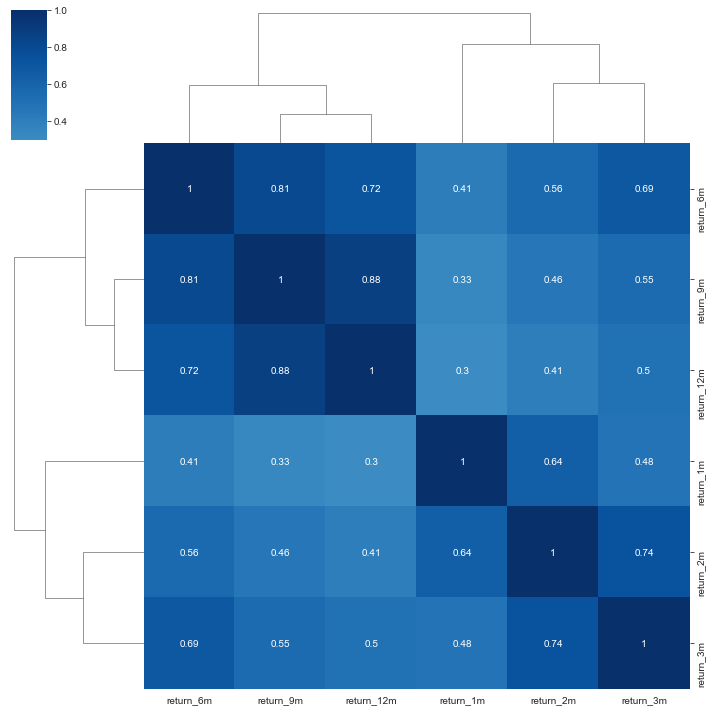

In [49]:
import seaborn as sns
sns.clustermap(data.corr('spearman'), annot=True, center=0, cmap='Blues');


## Lagged Month Returns

In [53]:
for t in range(1, 7):
    data[f'return_1m_t-{t}'] = data.groupby(level='Ticker').return_1m.shift(t)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 4609 entries, ('A', Timestamp('2022-01-31 00:00:00', freq='M')) to ('Y', Timestamp('2022-12-31 00:00:00', freq='M'))
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   return_1m      4609 non-null   float64
 1   return_2m      4609 non-null   float64
 2   return_3m      4609 non-null   float64
 3   return_6m      4609 non-null   float64
 4   return_9m      4609 non-null   float64
 5   return_12m     4609 non-null   float64
 6   return_1m_t-1  4209 non-null   float64
 7   return_1m_t-2  3812 non-null   float64
 8   return_1m_t-3  3418 non-null   float64
 9   return_1m_t-4  3029 non-null   float64
 10  return_1m_t-5  2643 non-null   float64
 11  return_1m_t-6  2259 non-null   float64
dtypes: float64(12)
memory usage: 465.9+ KB
